In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting the Directory
os.chdir("E:/Analytics/edWisor/Project")

In [3]:
# Importing the Database
daydb = pd.read_csv("day.csv")

In [4]:
daydb.columns

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt'],
      dtype='object')

In [5]:
daydb.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
daydb.shape

(731, 16)

In [7]:
# Description of each variable
daydb.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Data type of each variable
daydb.ftypes

instant         int64:dense
dteday         object:dense
season          int64:dense
yr              int64:dense
mnth            int64:dense
holiday         int64:dense
weekday         int64:dense
workingday      int64:dense
weathersit      int64:dense
temp          float64:dense
atemp         float64:dense
hum           float64:dense
windspeed     float64:dense
casual          int64:dense
registered      int64:dense
cnt             int64:dense
dtype: object

In [9]:
# Checking null values
daydb.apply(lambda x: sum(x.isnull()))

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Checking the unique values in each variable
daydb.apply(lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [11]:
db = daydb.groupby('yr').count()

In [12]:
db

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
yr,,,,,,,,,,,,,,,
0,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
1,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366


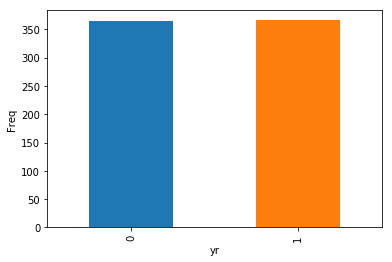

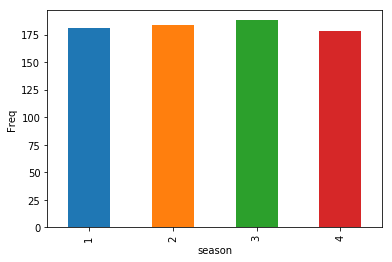

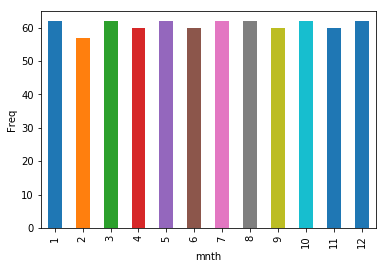

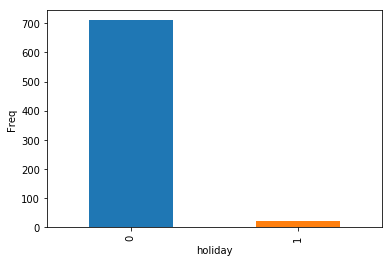

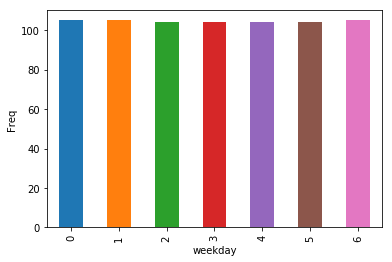

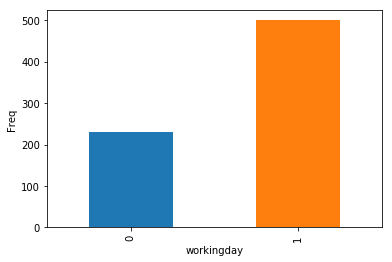

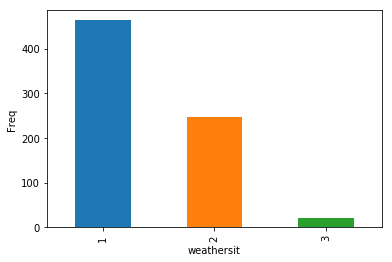

In [13]:
# Distribution of categorical independant variables
for i in ['yr', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    plt.subplots()
    plt.ylabel("Freq")
    daydb.groupby(i)['cnt'].count().plot.bar()

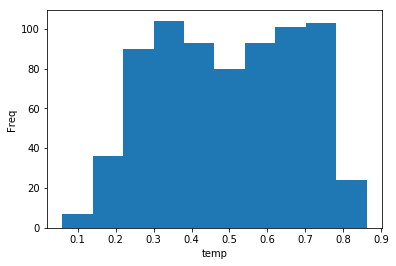

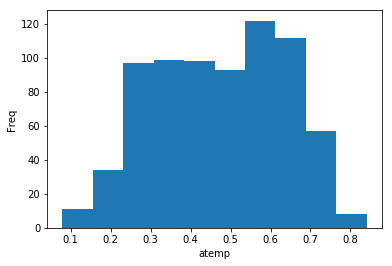

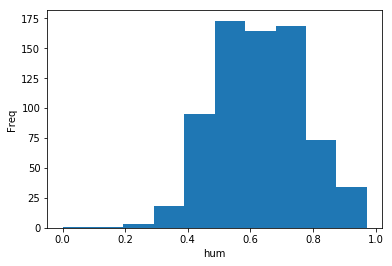

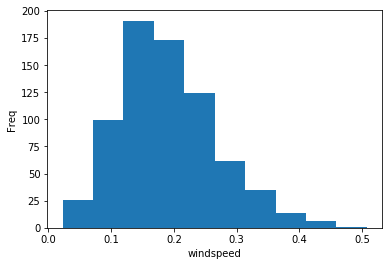

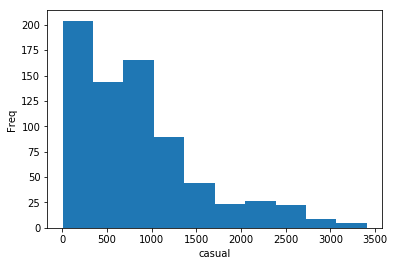

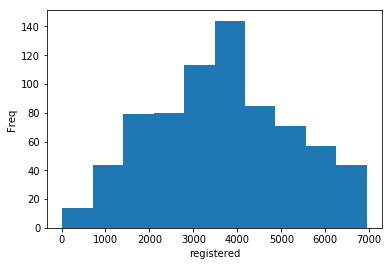

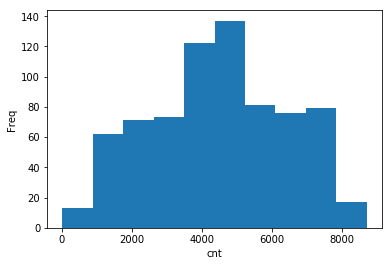

In [14]:
# Distribution of numerical independant variables & target variables
for i in ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']:
    plt.subplots()
    plt.ylabel("Freq")
    plt.xlabel(i)
    plt.hist(daydb[i])

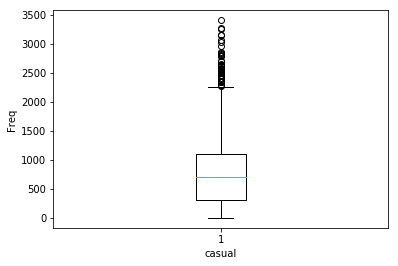

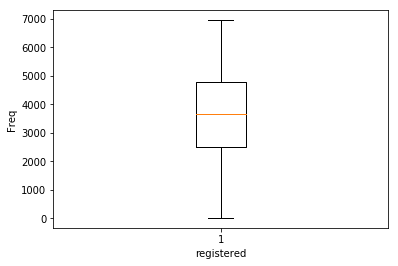

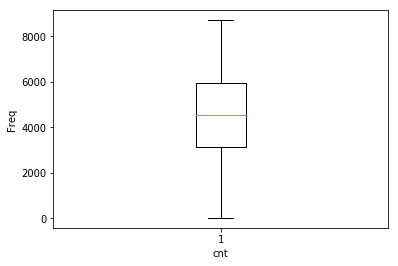

In [15]:
#Outlier analysis of Target Variables
for i in ['casual', 'registered', 'cnt']:
    plt.subplots()
    plt.ylabel("Freq")
    plt.xlabel(i)
    plt.boxplot(daydb[i])

In [16]:
daydb_df = daydb.drop(labels = ['instant', 'dteday'], axis=1)

In [17]:
daydb_df.columns

Index([u'season', u'yr', u'mnth', u'holiday', u'weekday', u'workingday',
       u'weathersit', u'temp', u'atemp', u'hum', u'windspeed', u'casual',
       u'registered', u'cnt'],
      dtype='object')

In [18]:
# Correlatoin Check
ddb_corr = daydb_df.corr()
ddb_corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


In [19]:
import seaborn as sb

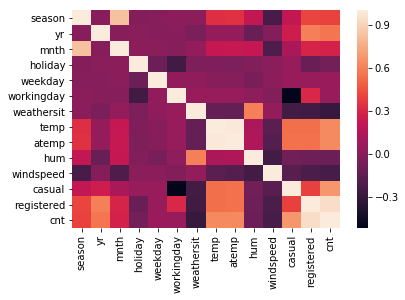

In [20]:
sb.heatmap(ddb_corr)

In [21]:
bike_rental = daydb.drop(labels = ['instant', 'dteday', 'atemp', 'mnth', 'casual', 'registered'], axis=1)

In [22]:
bike_rental['cntlog'] = np.log10(bike_rental.cnt)

In [23]:
bike_rental.drop(labels='cnt', axis=1, inplace=True)
bike_rental.columns

Index([u'season', u'yr', u'holiday', u'weekday', u'workingday', u'weathersit',
       u'temp', u'hum', u'windspeed', u'cntlog'],
      dtype='object')

In [24]:
for i in bike_rental.columns:
    bike_rental[i] = pd.to_numeric(bike_rental[i])

Model Development

In [25]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(bike_rental, test_size = 0.2)

C:\Users\Prashant\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
print train.shape, test.shape

(584, 10) (147, 10)


In [27]:
x_train = train.iloc[:,0:9]
y_train = train.iloc[:,9]
print x_train.shape, y_train.shape

(584, 9) (584L,)


In [28]:
x_test = test.iloc[:,0:9]
y_test = test.iloc[:,9]
print x_test.shape, y_test.shape

(147, 9) (147L,)


Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
RF_model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)

In [31]:
predict_RF = RF_model.predict(x_test)

In [32]:
def MAPE(y, y_predicted):
    mape = np.mean(np.abs((y-y_predicted)/y))
    return mape

In [33]:
error_rate = MAPE(y_test, predict_RF)
print error_rate

0.0169349942177


In [34]:
# predict_cnt = []
# for x in predict_RF:
#     c = round(10**x)
#     predict_cnt.append(c)

In [35]:
# predict_cnt

In [36]:
len(y_test)+1

148

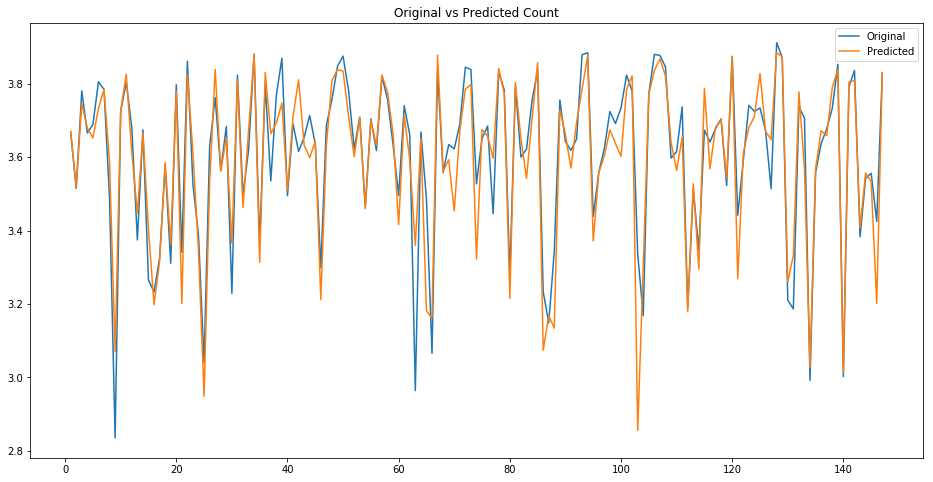

In [37]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(range(1,len(y_test)+1), y_test, label = 'Original')
plt.plot(range(1,len(y_test)+1), predict_RF, label = 'Predicted')
plt.legend(loc = 'best')
plt.title("Original vs Predicted Count")
plt.show()

In [38]:
# Random forest - 100
# Error Rate: 0.170903488754
# Accuracy: 82.91%

# Random forest - 500
# Error Rate: 0.172049628558
# Accuracy: 82.91%

Linear Regression

In [39]:
# from sklearn.linear_model import LinearRegression

In [40]:
# LR_model = LinearRegression().fit(x_train, y_train)

In [41]:
# predict_LR = LR_model.predict(x_test)

In [42]:
# error_LR = MAPE(y_test, predict_LR)
# print error_LR

0.0238829054359


In [43]:
# Linear Regression
# Error Rate: 0.0255007910762
# Accuracy: 97.45%

Decision Tree

In [44]:
# from sklearn.tree import DecisionTreeRegressor

In [45]:
# DTR_model = DecisionTreeRegressor().fit(x_train, y_train)

In [46]:
# predict_DTR = DTR_model.predict(x_test)

In [47]:
# error_DTR = MAPE(y_test, predict_DTR)
# print error_DTR

0.0241312953519


In [48]:
# Decision Tree Regressor
# Error Rate: 0.0278182652521
# Accuracy: 97.22%

KNN Regression

In [49]:
# from sklearn.neighbors import KNeighborsRegressor

In [50]:
# KNR_model = KNeighborsRegressor(n_neighbors = 10).fit(x_train, y_train)

In [51]:
# predict_KNR = KNR_model.predict(x_test)

In [52]:
# error_KNR = MAPE(y_test, predict_KNR)
# print error_KNR

0.020910874008


In [53]:
# KNN Model
# Error Rate: 0.0253418983993
# Accuracy: 97.47%

Reading Sample Data from CSV and fitting with the model to get the output

In [54]:
sam_db = pd.read_csv("Sample-data.csv")

In [55]:
sam_data = sam_db.drop(labels = ['instant', 'dteday', 'atemp', 'mnth'], axis=1)

In [56]:
samp_count = RF_model.predict(sam_data)

In [57]:
predict_cnt = []
for x in samp_count:
    c = round(10**x)
    predict_cnt.append(c)

In [58]:
sam_db['cnt'] = np.round(predict_cnt, decimals = 0)

In [59]:
sam_db.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1000,10-05-2014,2,4,5,0,6,0,1,0.5325,0.522721,0.489167,0.115671,7470.0


In [60]:
sam_db.to_csv("Sample_Data_Output_Python.csv")